<a href="https://colab.research.google.com/github/vinits7/ML-Projects/blob/main/telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vinit Shah**

**Churn Prediction in Telecom Industry using Logistic Regression**

**Business problem overview**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. Here we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

**Definitions of churn**

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’. The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

**Usage-based churn**

In this project, we will use the usage-based definition to define churn. Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

**Approach:**

We have performed data preprocessing, Missing Value Analysis, Feature Engineering, identified most valuable customers, tagged churners, and performed required EDA. We have mentioned few inferences observed during EDA.
As part of data preparation, we have split the data into train-test dataset and performed SMOTE on training dataset to handle class imbalance. We have performed scaling (Used Robust scaling to handle outliers) before building our first model.
We have used Logistic Regression model on actual features. We have used RFE to select top 20 features and then performed manual tunning to remove multicollinearity and make sure that all beta coefficients are statistically significant. From final Logistic Regression model, we can find below features importance to perform churn prediction.

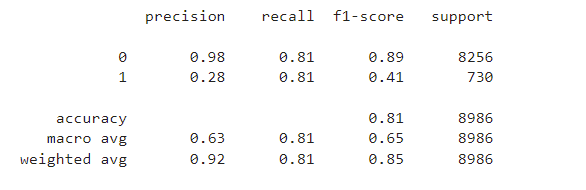

We have got almost similar Accuracy and Recall on training and testing dataset.

Here probability cutoff .5 is well balanced. If business wants to increase Recall/Sensitivity further, then this probability cut-off can be reduced to .4 or .3, but in that case specificity and precision will reduce further (More users will be identify as churners who are actually not).

Then we have performed PCA and kept 97% of variance by selecting 39 Principal Components. We used Random Forest and then performed hyperparameters tunning to tune our Random Forest model. Final Classification on testing dataset report after performing hyperparameters tunning is as below
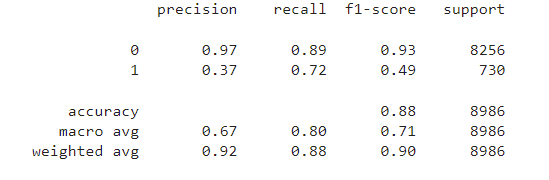

Followed by that, We used XGBoost Classifier and then perfomed hyperparameters tunning to tune our XGB Classifier model. Final Classification on testing dataset report after performing hyperparameters tunning is as below:

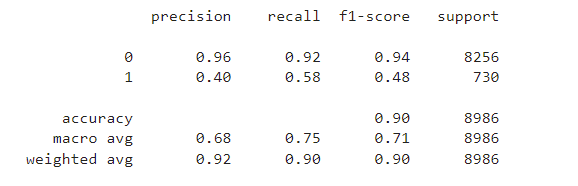



In [ ]:
# Installing external packages
!pip install missingno
!pip install imbalanced-learn
!pip install joblib
!pip install sklearn
!pip install sklearn.externals
!pip install sklearn.metrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev

In [ ]:
# Importing required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [ ]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

Reading and understanding the data

In [ ]:
# Loading data
data0= pd.read_csv('telecom_churn_data.csv')
data0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
# Checking shape of dataframe
data0.shape

(99999, 226)

In [ ]:
#Checking dataframe info
data0.info(verbose= 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [ ]:
#Checking descriptive statistics
data0.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


Explaining dataset
After eyeballing and exploring the data, we can categorize 226 different attributes into below categories:

mobile_number
circle_id
aon : days on network
31*4= 124 mou (Minutes of Usage) columns for 4 months and 3 consolidated columns (loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou)
12 date columns related to different last recharges for 4 different months
12 arpu (Average Revenue Per User) columns across different segments for 4 different months
36 columns contains information about different recharges done by the user for each of these 4 months: total_rech_num_* (no. of total recharges), total_rech_amt_* (amount of total recharge), total_rech_data_* (no. of total data recharges (2g + 3g), max_rech_data_* (maximum amount of data recharge), av_rech_amt_data_* (average amount of each data recharge), count_rech_2g/3g_* (count of 2g and 3g recharges in each month), last_day_rch_amt_* (last recharge amount by the user)
8 vol_* columns have information of consumed 2g and 3g data volume by the user for each 4 months.
4 *_vbc_3g contains info about volume based 3g consumption by the users.
4 night_pck_user_* categorical features contain if a user has active night pack for a month.
16 sachet_* and monthly_* columns have information about the no. of monthly/sachet packs used by users.
4 fb_user_* categorical features contain if a user has fb service activated or not.

Data pre-processing

In [ ]:
# Checking for duplicate entry
data0['mobile_number'].duplicated().any()

False

In [ ]:
# Checking % of missing values
round(data0.isnull().sum()/ data0.shape[0], 2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              0.01
std_og_t2o_mou              0.01
loc_ic_t2o_mou              0.01
last_date_of_month_6        0.00
last_date_of_month_7        0.01
last_date_of_month_8        0.01
last_date_of_month_9        0.02
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 0.04
onnet_mou_7                 0.04
onnet_mou_8                 0.05
onnet_mou_9                 0.08
offnet_mou_6                0.04
offnet_mou_7                0.04
offnet_mou_8                0.05
offnet_mou_9                0.08
roam_ic_mou_6               0.04
roam_ic_mou_7               0.04
roam_ic_mou_8               0.05
roam_ic_mou_9               0.08
roam_og_mou_6               0.04
roam_og_mou_7               0.04
roam_og_mou_8               0.05
roam_og_mou_9               0.08
loc_og_t2t_mou_6            0.04
loc_og_t2t

There are 39 columns having missing data > 70%. We'll analyze these

Missing Value Analysis (MCAR, MAR, MNAR)
We'll perform missing value analysis to understand if observed missing values in different columns are MCAR, MAR or MNAR. We'll start with the assumption that missing values in diffrent columns are MAR and will try to establish the assumption. At this stage we'll only impute missing values with business knowledge only. We'll not perform any kind of statistical imputation at this stage.

Analysing missing values in date_of_last_rech_* and total_rech_data_*
Assumption: We can assume that Null values in date_of_last_rech_* columns are denoting that the customer has not recharged in that month. Then for those datapoints total_rech_data_, av_rech_amt_data_, max_rech_data_* columns also should have Null values. If these 4 types of columns have null values for exact indexes, then we can consider our assumption as True and can impute missing values in total_rech_data_, av_rech_amt_data_, max_rech_data_* columns with 0.

In [ ]:
# Comparing index of missing values across all 4 column types

check1= ((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.total_rech_data_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.av_rech_amt_data_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.max_rech_data_6.isnull()].index).all())

check2= ((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.total_rech_data_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.av_rech_amt_data_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.max_rech_data_7.isnull()].index).all())

check3= ((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.total_rech_data_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.av_rech_amt_data_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.max_rech_data_8.isnull()].index).all())

check4= ((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.total_rech_data_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.av_rech_amt_data_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.max_rech_data_9.isnull()].index).all())

if check1 & check2 & check3 & check4:
    print('Assumption is True, We can impute missing values in total_rech_data_*, av_rech_amt_data_*, max_rech_data_* columns \
          with 0 ')

Assumption is True, We can impute missing values in total_rech_data_*, av_rech_amt_data_*, max_rech_data_* columns           with 0 


In [ ]:
# Imputing missing values in total_rech_data_*, av_rech_amt_data_*, max_rech_data_* columns

cols1= ['total_rech_data_6', 'av_rech_amt_data_6', 'max_rech_data_6',
                    'total_rech_data_7', 'av_rech_amt_data_7', 'max_rech_data_7',
                    'total_rech_data_8', 'av_rech_amt_data_8', 'max_rech_data_8',
                    'total_rech_data_9', 'av_rech_amt_data_9', 'max_rech_data_9']

for col in cols1:
    data0[col].fillna(0, inplace= True)


data0[cols1].isna().sum()

total_rech_data_6     0
av_rech_amt_data_6    0
max_rech_data_6       0
total_rech_data_7     0
av_rech_amt_data_7    0
max_rech_data_7       0
total_rech_data_8     0
av_rech_amt_data_8    0
max_rech_data_8       0
total_rech_data_9     0
av_rech_amt_data_9    0
max_rech_data_9       0
dtype: int64

Analysing missing values in arpu_2g_, arpu_3g_, count_rech_2g_, count_rech_3g_ and night_pck_user_*

In [ ]:

# Checking value_counts
data0.night_pck_user_6.value_counts(dropna= False)

NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

Assumption: We'll again check if arpu_2g_, arpu_3g_, count_rech_2g_, count_rech_3g_ and night_pck_user_* columns have missing values only for those observations for which date_of_last_rech_data_* for that corresponsing month is also missing. If above statement is True, then we can impute these missing values with 0. Again for night_pck_user_ it can be seen to prominent categories 0 : Customers not having night packs, 1: customers having night packs. NaN may signify that the customer is not making any call during night, means an Inactive customer.

In [ ]:
# Comparing index of missing values across all 5 column types

check1= ((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.arpu_2g_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.arpu_3g_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.night_pck_user_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.count_rech_2g_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.count_rech_3g_6.isnull()].index).all())

check2= ((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.arpu_2g_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.arpu_3g_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.night_pck_user_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.count_rech_2g_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.count_rech_3g_7.isnull()].index).all())

check3= ((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.arpu_2g_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.arpu_3g_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.night_pck_user_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.count_rech_2g_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.count_rech_3g_8.isnull()].index).all())

check4= ((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.arpu_2g_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.arpu_3g_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.night_pck_user_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.count_rech_2g_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.count_rech_3g_9.isnull()].index).all())


if check1 & check2 & check3 & check4:
    print('Assumption is True, We can impute missing values in arpu_*, night_pck_user_* columns with 0 ')

Assumption is True, We can impute missing values in arpu_*, night_pck_user_* columns with 0 


In [ ]:
# Imputing missing values in arpu_2g_*, arpu_3g_*, night_pck_user_* columns

cols2= ['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'count_rech_2g_6', 'count_rech_3g_6',
       'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_2g_8', 'count_rech_3g_8', 'count_rech_2g_9', 'count_rech_3g_9',]


for col in cols2:
    data0[col].fillna(0, inplace= True)


data0[cols2].isna().sum()

arpu_2g_6           0
arpu_2g_7           0
arpu_2g_8           0
arpu_2g_9           0
arpu_3g_6           0
arpu_3g_7           0
arpu_3g_8           0
arpu_3g_9           0
night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
count_rech_2g_6     0
count_rech_3g_6     0
count_rech_2g_7     0
count_rech_3g_7     0
count_rech_2g_8     0
count_rech_3g_8     0
count_rech_2g_9     0
count_rech_3g_9     0
dtype: int64

Analysing missing values fb_user_* columns

In [ ]:
# Checking value_counts()
data0.fb_user_6.value_counts(dropna= False)

NaN    74846
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

Assumption: Checking if fb_user_* columns have missing values only for those observations for which date_of_last_rech_data_* for that corresponsing month is missing. If above statement is True, then we can impute these missing values with 0.

In [ ]:
# Comparing index of missing values for fb_user_* columns

check1= ((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.fb_user_6.isnull()].index).all())
check2= ((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.fb_user_7.isnull()].index).all())
check3= ((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.fb_user_8.isnull()].index).all())
check4= ((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.fb_user_9.isnull()].index).all())

if check1 & check2 & check3 & check4:
    print('Assumption is True, We can impute missing values in fb_user_* columns with 0 ')

Assumption is True, We can impute missing values in fb_user_* columns with 0 


In [ ]:
# Imputing missing values in total_rech_data_, av_rech_amt_data_, max_rech_data_* columns

cols3= ['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


for col in cols3:
    data0[col].fillna(0, inplace= True)


data0[cols3].isna().sum()

fb_user_6    0
fb_user_7    0
fb_user_8    0
fb_user_9    0
dtype: int64

In [ ]:
# Checking columns having missing values
round(data0.isnull().sum()/ data0.shape[0], 2).sort_values(ascending= False)

date_of_last_rech_data_6    0.75
date_of_last_rech_data_9    0.74
date_of_last_rech_data_8    0.74
date_of_last_rech_data_7    0.74
loc_ic_t2t_mou_9            0.08
std_ic_t2t_mou_9            0.08
std_ic_mou_9                0.08
std_og_t2c_mou_9            0.08
roam_og_mou_9               0.08
std_og_t2f_mou_9            0.08
loc_og_t2t_mou_9            0.08
std_ic_t2o_mou_9            0.08
std_og_t2t_mou_9            0.08
loc_og_t2m_mou_9            0.08
std_og_t2m_mou_9            0.08
roam_ic_mou_9               0.08
loc_og_t2f_mou_9            0.08
std_ic_t2f_mou_9            0.08
loc_og_t2c_mou_9            0.08
std_ic_t2m_mou_9            0.08
loc_ic_mou_9                0.08
loc_og_mou_9                0.08
std_og_mou_9                0.08
offnet_mou_9                0.08
spl_ic_mou_9                0.08
isd_og_mou_9                0.08
loc_ic_t2m_mou_9            0.08
onnet_mou_9                 0.08
loc_ic_t2f_mou_9            0.08
ic_others_9                 0.08
og_others_

There are 29 x 4= 116 incoming and outgoing call minutes of usage columns (*mou_* columns, og_others* and ic_others_*) where we can see missing values are present. It's very tiresome activity to tally indexes of all these columns to confirm our assumption that these missing values are MAR. We'll use missingno package to see the correlation heatmap of missing values for these columns one by one for each month. If we get correlation of 1, then we can say these are MAR, these missing values have an observed relation with missing values in other columns. Then we will **compare any one of these columns with total_og_mou_* (total outgoing minutes in a moth) and total_ic_mou_* (total incoming minutes in a month).** If observations with missing values in this one representative column also have 0 value in both total_og_mou and total_ic_mou columns for the corresponding month then we can conclude that: As total incoming and outgoing mou is zero in that month, so any sub-class values for that month will also be 0. So, if assumption is True then we can impute missing values in all these columns with 0.

<Axes: >

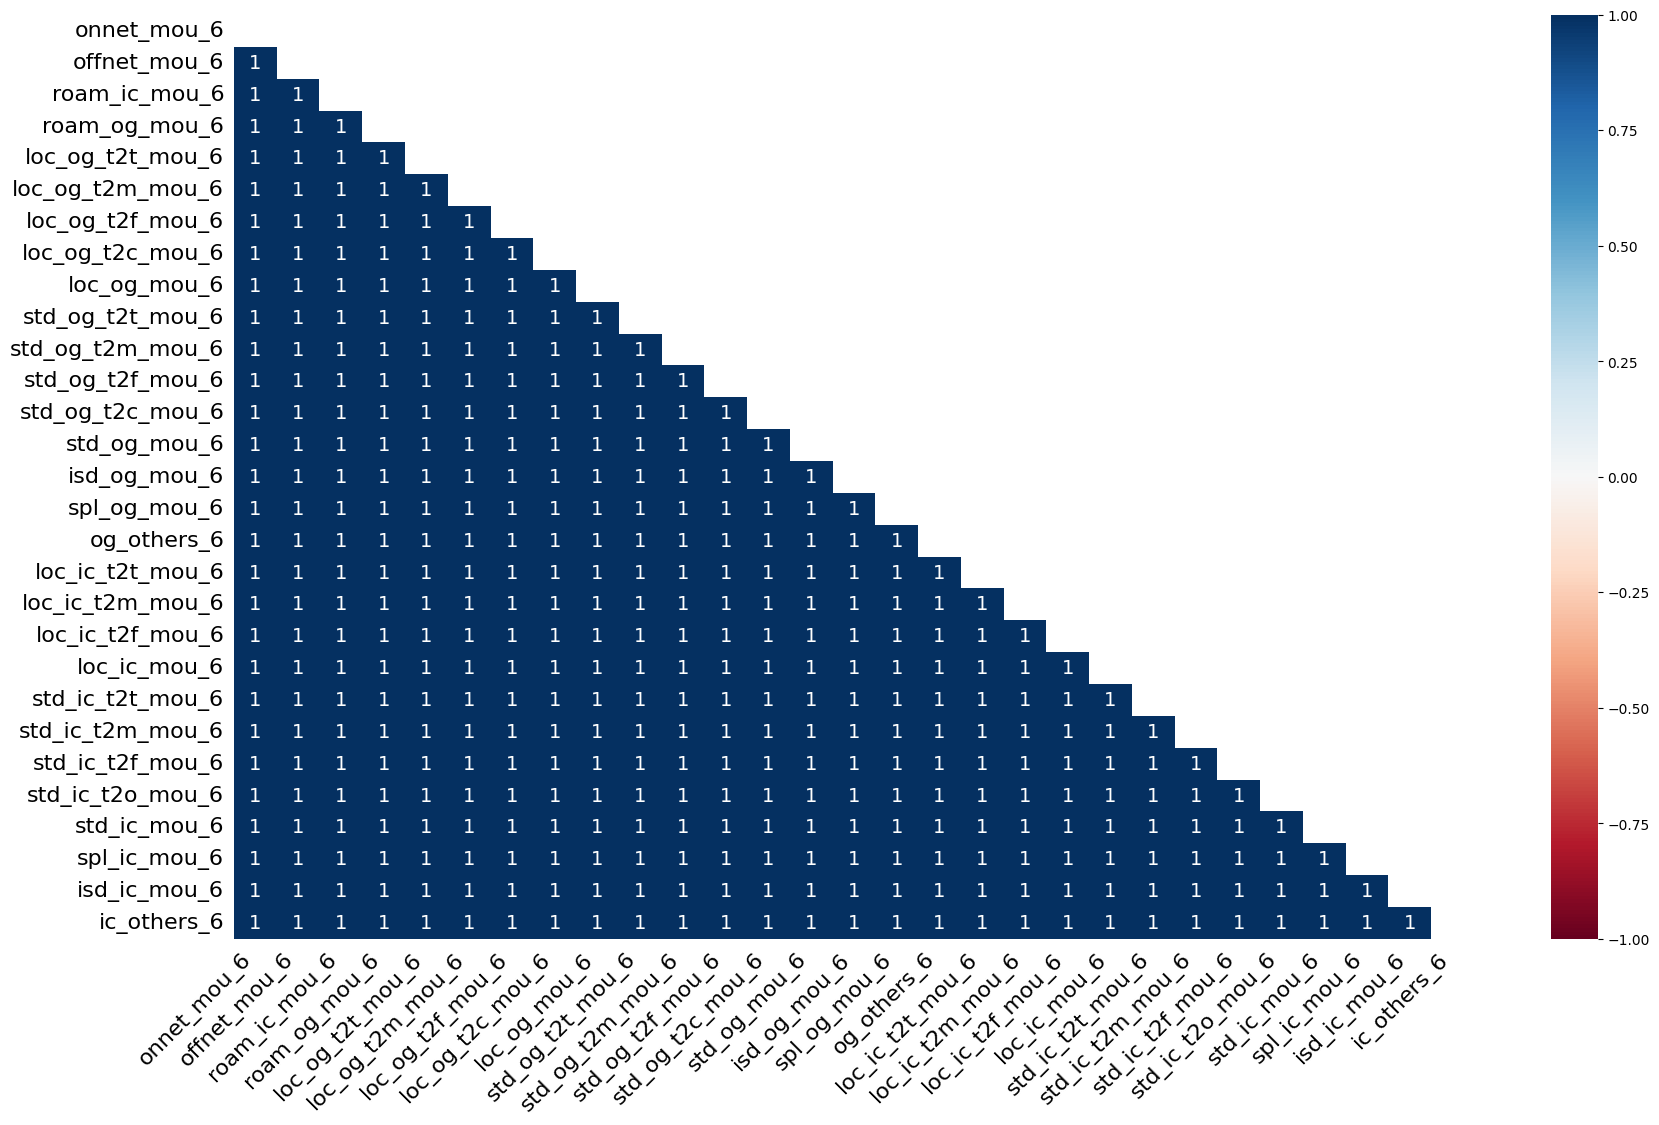

In [ ]:
# Checking correlation of missing values between all *_mou6 columns
msno.heatmap(data0.loc[:, data0.columns.str.endswith(('mou_6', '_others_6', 'total_og_mou_6'))])

<Axes: >

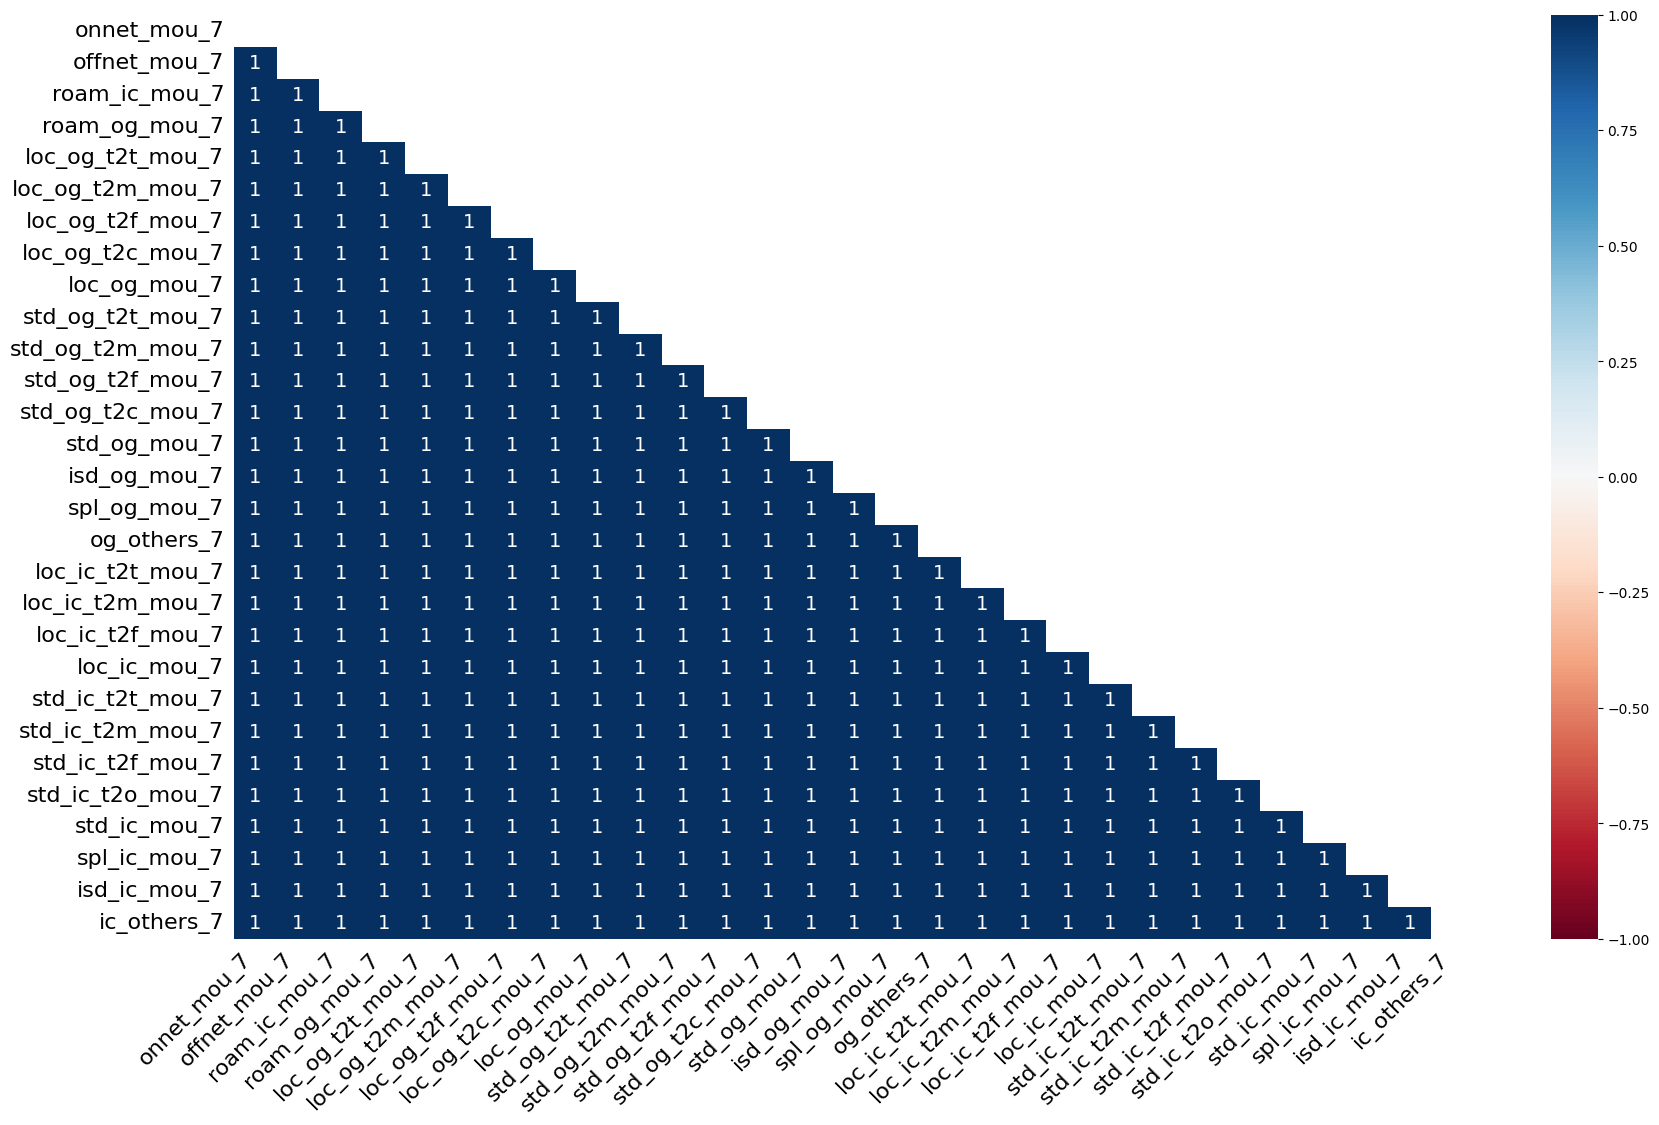

In [ ]:
# Checking correlation of missing values between all *_mo7 columns
msno.heatmap(data0.loc[:, data0.columns.str.endswith(('mou_7', '_others_7'))])

<Axes: >

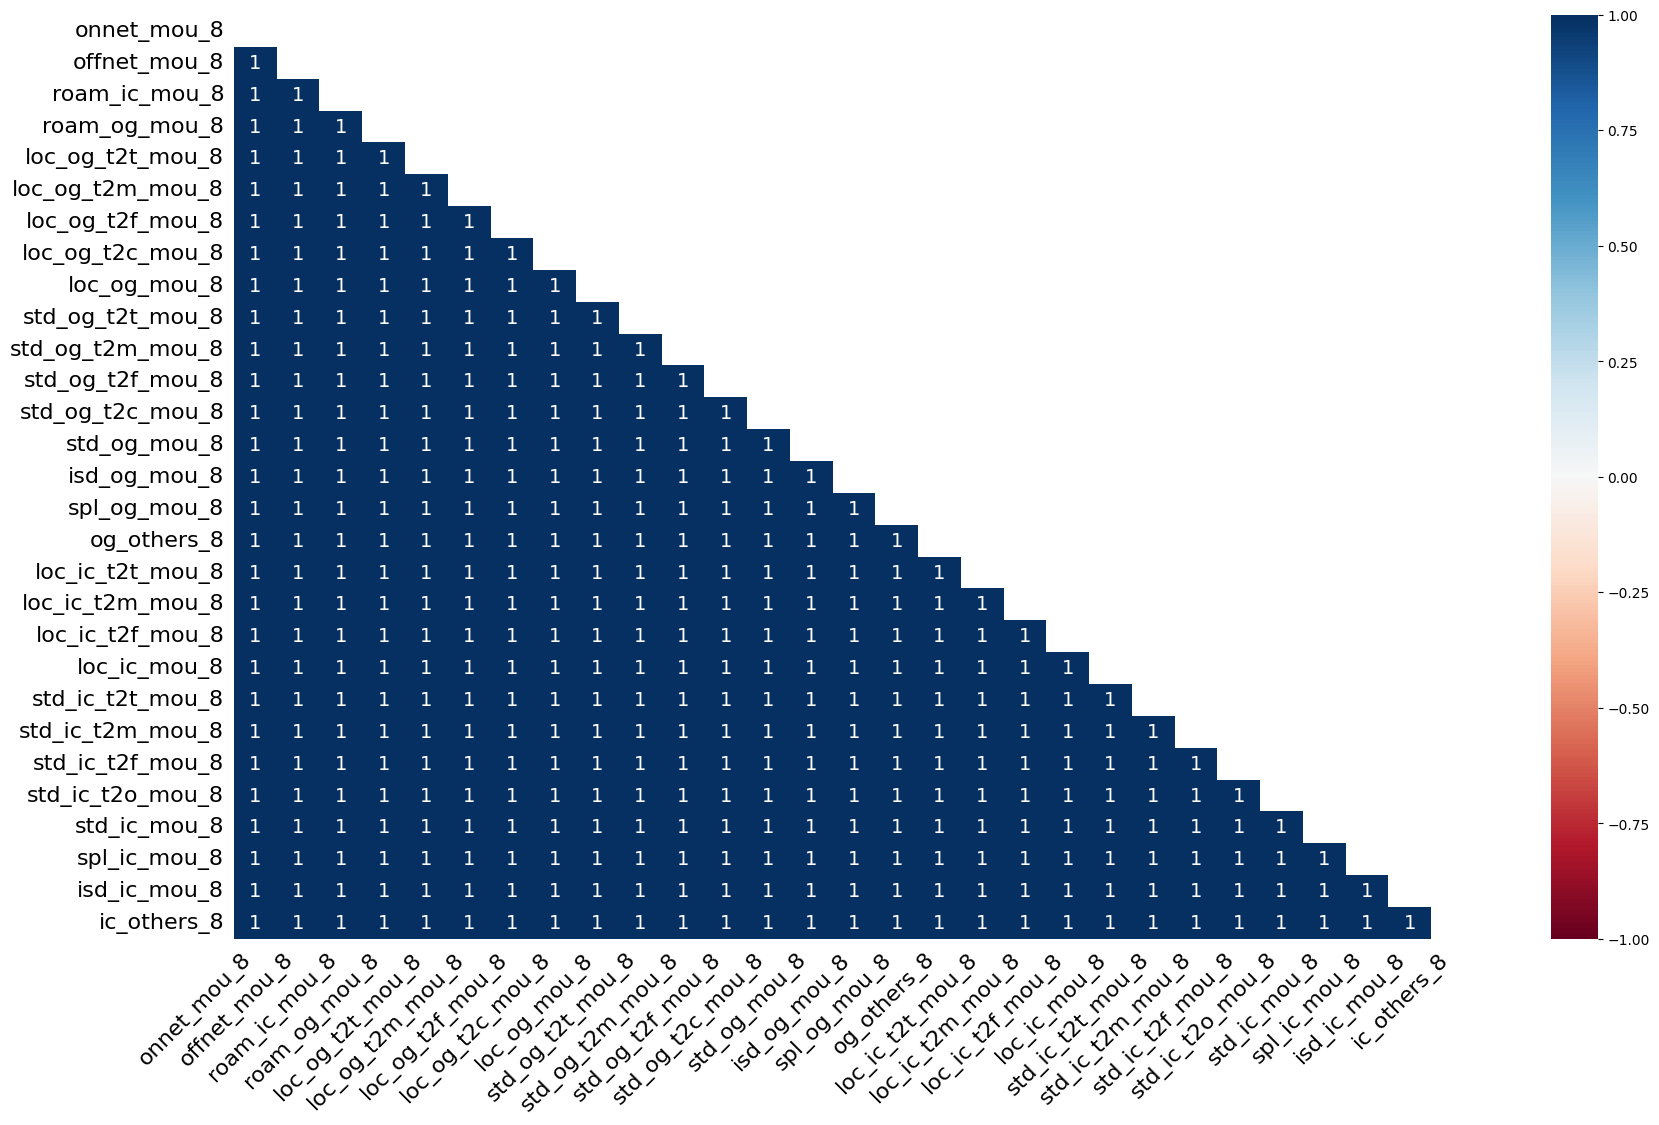

In [ ]:
# Checking correlation of missing values between all *_mou8 columns
msno.heatmap(data0.loc[:, data0.columns.str.endswith(('mou_8', '_others_8'))])

<Axes: >

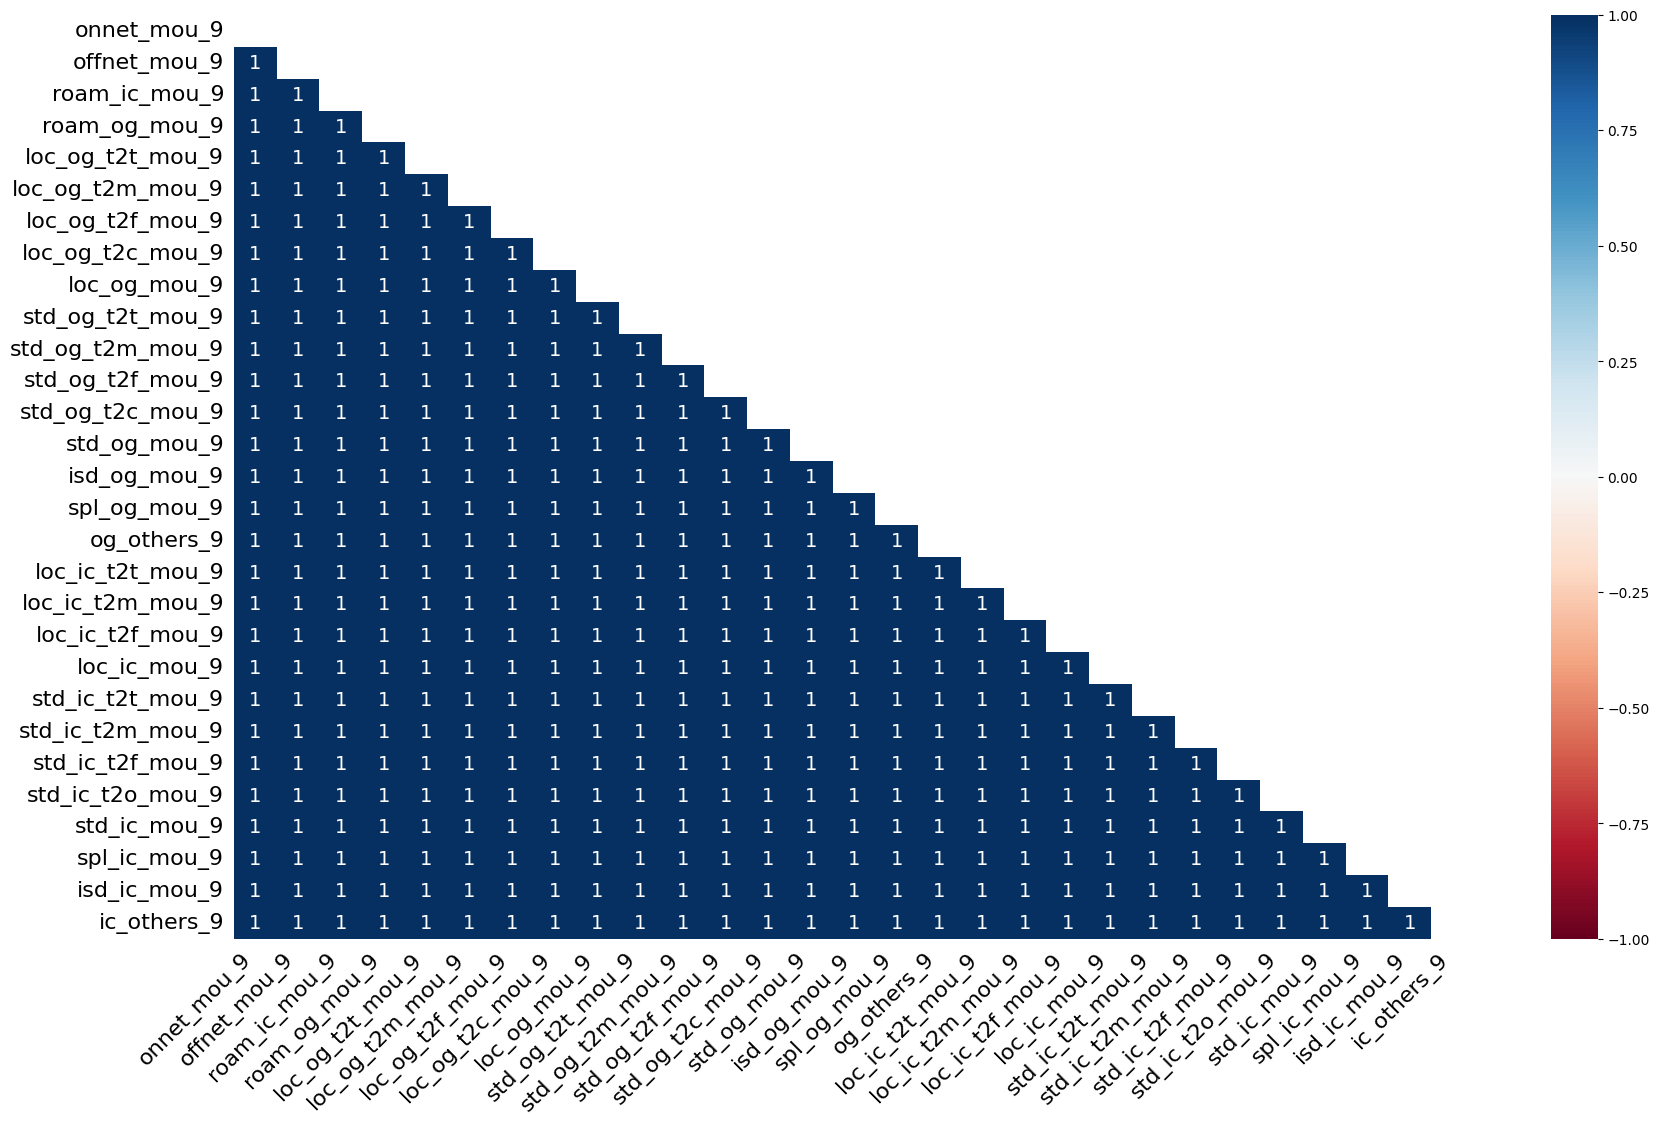

In [ ]:
# Checking correlation of missing values between all *_mou9 columns
msno.heatmap(data0.loc[:, data0.columns.str.endswith(('mou_9', '_others_9'))])

In [ ]:
# Getting indexes of observations for which onnet_mou_* is missing for month 6,7,8,9
ind6= data0[data0.onnet_mou_6.isna()].index
ind7= data0[data0.onnet_mou_7.isna()].index
ind8= data0[data0.onnet_mou_8.isna()].index
ind9= data0[data0.onnet_mou_9.isna()].index

# Checking values of total incoming and total outgoing mou for all 4 months for observations having above indexes.

print('Month 6 incoming calls for observations having missing mou data: ', *data0.loc[ind6, 'total_ic_mou_6'].unique())
print('Month 6 outgoing calls for observations having missing mou data: ', *data0.loc[ind6, 'total_og_mou_6'].unique())
print('Month 7 incoming calls for observations having missing mou data: ', *data0.loc[ind7, 'total_ic_mou_7'].unique())
print('Month 7 outgoing calls for observations having missing mou data: ', *data0.loc[ind7, 'total_og_mou_7'].unique())
print('Month 8 incoming calls for observations having missing mou data: ', *data0.loc[ind8, 'total_ic_mou_8'].unique())
print('Month 8 outgoing calls for observations having missing mou data: ', *data0.loc[ind8, 'total_og_mou_8'].unique())
print('Month 9 incoming calls for observations having missing mou data: ', *data0.loc[ind9, 'total_ic_mou_9'].unique())
print('Month 9 outgoing calls for observations having missing mou data: ', *data0.loc[ind9, 'total_og_mou_9'].unique())

Month 6 incoming calls for observations having missing mou data:  0.0
Month 6 outgoing calls for observations having missing mou data:  0.0
Month 7 incoming calls for observations having missing mou data:  0.0
Month 7 outgoing calls for observations having missing mou data:  0.0
Month 8 incoming calls for observations having missing mou data:  0.0
Month 8 outgoing calls for observations having missing mou data:  0.0
Month 9 incoming calls for observations having missing mou data:  0.0
Month 9 outgoing calls for observations having missing mou data:  0.0


Above, we can see all these observations have 0 values. So, our assumption is True and we can impute missing values in all above columns with 0.

In [ ]:
# Missing value imputation
mou_cols= data0.loc[:,data0.columns.str.endswith(('mou_6', 'mou_7', 'mou_8', '_others_6', '_others_7','_others_8', 'mou_9', '_others_9'))].columns
for col in mou_cols:
    data0[col].fillna(0, inplace= True)

# Checking missing values again
data0.isna().sum().sort_values(ascending= False)

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_9    74077
date_of_last_rech_data_8    73660
date_of_last_rech_9          4760
date_of_last_rech_8          3622
date_of_last_rech_7          1767
last_date_of_month_9         1659
date_of_last_rech_6          1607
last_date_of_month_8         1100
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_7          601
last_day_rch_amt_7              0
mobile_number                   0
last_day_rch_amt_6              0
last_day_rch_amt_8              0
max_rech_amt_8                  0
max_rech_amt_7                  0
max_rech_amt_9                  0
total_rech_data_6               0
last_day_rch_amt_9              0
total_rech_amt_9                0
total_rech_data_7               0
total_rech_data_8               0
total_rech_data_9               0
max_rech_data_6                 0
max_rech_data_7                 0
max_rech_data_

Dropping unnecessary columns

In [ ]:
# Checking value_counts for loc_og_t2o_mou , std_og_t2o_mou , loc_ic_t2o_mou columns
print(data0.loc_og_t2o_mou.value_counts(dropna= False))
print(data0.std_og_t2o_mou.value_counts(dropna= False))
print(data0.loc_ic_t2o_mou.value_counts(dropna= False))

0.0    98981
NaN     1018
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
NaN     1018
Name: std_og_t2o_mou, dtype: int64
0.0    98981
NaN     1018
Name: loc_ic_t2o_mou, dtype: int64


All these columns have 0 value and missing values. As it's minutes of usage column it can not be categorical. Even if we impute these missing values using mean, median imputation value will be 0. That will make these columns zero variance column with mean 0. Information Value for these columns will be 0. hence dropping these columns instead of imputing.

In [ ]:
# Dropping above 3 columns
data0.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis= 1, inplace= True)

Dropping all date columns, as we have redundant information from other features so these date columns will not add much of new insights for our analysis. Also dropping mobile_number.

In [ ]:
# Dropping mobile no. column
data0.drop('mobile_number', axis= 1, inplace= True)

In [ ]:
# Dropping all date columns
print('Shape before dropping:', data0.shape)
data0= data0.loc[:, ~data0.columns.str.contains('date_of')]
print('Shape after dropping:', data0.shape)

# Checking missing values again
data0.isna().sum().sort_values(ascending= False)

Shape before dropping: (99999, 222)
Shape after dropping: (99999, 210)


circle_id             0
count_rech_3g_6       0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
last_day_rch_amt_9    0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
total_rech_num_9      0
total_rech_num_8      0
total_rech_num_7      0
spl_ic_mou_6          0
std_ic_t2o_mou_8      0
std_ic_t2o_mou_9      0
std_ic_mou_6          0
std_ic_mou_7          0
std_ic_mou_8          0
std_ic_mou_9          0
total_ic_mou_6        0
total_ic_mou_7        0
total_ic_mou_8        0
total_ic_mou_9        0
spl_ic_mou_7          0
total_rech_num_6      0
spl_ic_mou_8    

All columns have now 0 missing values.

Renaming columns and changing data types

In [ ]:
# Columns not having _<month no.> as suffix
data0.loc[:,~ data0.columns.str.endswith(('_6','_7','_8', '_9'))].columns

Index(['circle_id', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

In [ ]:
# Renaming the columns
data0.rename(columns= {'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}, inplace= True)

In [ ]:
# Changing to integer from float
cat_col= ['fb_user_6', 'night_pck_user_6', 'fb_user_7', 'night_pck_user_7', 'fb_user_8', 'night_pck_user_8']
data0[cat_col]= data0[cat_col].astype('int')

In [ ]:
data1= data0.copy()

Feature Engineering

To identify high-value customers we'll perform feature engineering. We'll calculate average amount of recharge done by customers in Good Months (6, 7).

In [ ]:
# Calculating total recharge amount for data in each month and dropping original columns

data1['total_rech_amt_data_6']= data1.total_rech_data_6 * data1.av_rech_amt_data_6
data1['total_rech_amt_data_7']= data1.total_rech_data_7 * data1.av_rech_amt_data_7
data1['total_rech_amt_data_8']= data1.total_rech_data_8 * data1.av_rech_amt_data_8
data1['total_rech_amt_data_9']= data1.total_rech_data_9 * data1.av_rech_amt_data_9

print('Shape before dropping:', data1.shape)

data1.drop(['total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_data_7', 'av_rech_amt_data_7',
           'total_rech_data_8', 'av_rech_amt_data_8', 'total_rech_data_9', 'av_rech_amt_data_9'], axis= 1, inplace= True)

print('Shape after dropping:', data1.shape)

Shape before dropping: (99999, 214)
Shape after dropping: (99999, 206)


In [ ]:
# Adding ARPU of data (3g and 2g) and dropping original columns

data1['arpu_data_6']=  data1.arpu_2g_6 + data1.arpu_3g_6
data1['arpu_data_7']=  data1.arpu_2g_7 + data1.arpu_3g_7
data1['arpu_data_8']=  data1.arpu_2g_8 + data1.arpu_3g_8
data1['arpu_data_9']=  data1.arpu_2g_9 + data1.arpu_3g_9

print('Shape before dropping:', data1.shape)
data1.drop(['arpu_2g_6', 'arpu_3g_6', 'arpu_2g_7', 'arpu_3g_7',
           'arpu_2g_8', 'arpu_3g_8', 'arpu_2g_9', 'arpu_3g_9'], axis= 1, inplace= True)
print('Shape after dropping:', data1.shape)

Shape before dropping: (99999, 210)
Shape after dropping: (99999, 202)


In [ ]:
# Calculating average recharge amount for month 6 and 7 combined
data1['avg_rech_amt_6_7']= (data1.total_rech_amt_data_6 + data1.total_rech_amt_data_7 +
                            data1.total_rech_amt_6 + data1.total_rech_amt_7)/2

Identifying high-value customers

In [ ]:
# Taking top 70 percentile customers as High Value customers
data_hvc= data1[data1.avg_rech_amt_6_7 > np.percentile(data1['avg_rech_amt_6_7'], 70)]

# Checking shape
data_hvc.shape

(29953, 203)

Tagging churners

We'll use total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 columns to tag the curners. For churners there will not be any voice and data usage.

In [ ]:
# Creating churn column and updating value of churn with 1 for the customers having no voice /data usage in month 9
data_hvc['churn']= 0
data_hvc.loc[(data_hvc.total_ic_mou_9== 0) & (data_hvc.total_og_mou_9== 0) & (data_hvc.vol_2g_mb_9== 0) & (data_hvc.vol_3g_mb_9== 0), 'churn']= 1
data_hvc.churn.value_counts(dropna= True, normalize= True)

0    0.918773
1    0.081227
Name: churn, dtype: float64

In [ ]:
# Channging data type of churn column
data_hvc['churn']= data_hvc.churn.astype('int')

In [ ]:
# Now dropping columns belong to month 9
col_9= data_hvc.loc[:, data_hvc.columns.str.endswith('_9')].columns
print('Shape before dropping:', data_hvc.shape)
data_hvc.drop(col_9, axis= 1, inplace= True)
print('Shape after dropping:', data_hvc.shape)

Shape before dropping: (29953, 204)
Shape after dropping: (29953, 154)


Dropping columns having zero variance

In [ ]:
### Droping Columns having zero variance
var_t= VarianceThreshold(threshold= 0)
variance_thresh= var_t.fit(data_hvc)
col_ind= var_t.get_support()

# Below data_hvc have zero variance
data_hvc.loc[:, ~col_ind].columns

Index(['circle_id', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], dtype='object')

In [ ]:
# Dropping columns
data_hvc.drop(data_hvc.loc[:, ~col_ind].columns, axis= 1, inplace= True)
data_hvc.shape

(29953, 147)

Exploratory Data Analysis

We have already derived few fetaures and based on domain knowledge we have identified important featured to perform further analysis.



In [ ]:
# columns to analyze
num_columns_to_analyze= ['total_rech_amt_data_6', 'arpu_data_6', 'arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'total_og_mou_6',
                         'total_ic_mou_6', 'vol_2g_mb_6', 'vol_3g_mb_6','total_rech_amt_data_7', 'arpu_data_7', 'arpu_7',
                         'onnet_mou_7', 'offnet_mou_7', 'total_og_mou_7', 'total_ic_mou_7', 'vol_2g_mb_7', 'vol_3g_mb_7',
                         'total_rech_amt_data_8', 'arpu_data_8', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'total_og_mou_8',
                         'total_ic_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8','aon'
                        ]

char_columns_to_analyze= ['fb_user_6', 'night_pck_user_6', 'fb_user_7', 'night_pck_user_7', 'fb_user_8', 'night_pck_user_8']

In [ ]:
# Dividing the data into two dataframes
data_hvc_0= data_hvc[data_hvc.churn== 0]
print('Shape of data_hvc_0:', data_hvc_0.shape)
data_hvc_1= data_hvc[data_hvc.churn== 1]
print('Shape of data_hvc_1:', data_hvc_1.shape)

Shape of data_hvc_0: (27520, 147)
Shape of data_hvc_1: (2433, 147)


In [ ]:
# Function for univariate analysis of categorical variables
def cat_univariate(app_df_new_0, app_df_new_1, col, fn_sup= 14, fn_s= 12, figsize= [20, 7], xtick_ro= 0):
    t0_col = float(len(app_df_new_0))
    t1_col = float(len(app_df_new_1))
    sns.set_style("whitegrid")
    fig= plt.figure(figsize= figsize)
    f1_x_label= f'{col} for churn= 0'
    f2_x_label= f'{col} for churn= 1'
    ax1= fig.add_subplot(1,2,1)
    ax1.set_xticklabels(f1_x_label, rotation= xtick_ro, ha= 'right',  fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    ax2= fig.add_subplot(1,2,2)
    ax2.set_xticklabels(f2_x_label, rotation= xtick_ro, ha= 'right',  fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    sup_t= f'Count plot for {col}'
    fig.suptitle(sup_t, fontdict= {'fontsize': fn_sup, 'color': 'Teal'})
    fig1= sns.countplot(data= app_df_new_0, x= col, ax= ax1, palette= 'Paired')
    fig2= sns.countplot(data= app_df_new_1, x= col, ax= ax2, palette= 'Paired_r')
    fig1.set_ylabel('Count', fontdict= {'fontsize': fn_s, 'color': 'Black'})
    fig1.set_xlabel(f1_x_label, fontdict= {'fontsize': fn_s, 'color': 'Black'})
    fig2.set_xlabel(f2_x_label, fontdict= {'fontsize': fn_s, 'color': 'Black'})
    for patch in fig1.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height()/t0_col)
        x= patch.get_x() + patch.get_width()
        y= patch.get_height()
        fig1.annotate(percentage, (patch.get_x() + patch.get_width() / 2.,
                patch.get_height()), ha= 'center', va= 'center',
                xytext= (0, 5), textcoords= 'offset points', fontsize= 11, family= 'verdana')

    for patch2 in fig2.patches:
        percentage= '{:.1f}%'.format(100 * patch2.get_height()/t1_col)
        x= patch2.get_x() + patch2.get_width()
        y= patch2.get_height()
        fig2.annotate(percentage, (patch2.get_x() + patch2.get_width() / 2.,
                patch2.get_height()), ha= 'center', va= 'center',
                xytext = (0, 5), textcoords= 'offset points', fontsize= 11, family='verdana')

In [ ]:
# Function to plot numeric columns distribution
def num_univariate(app_df_new_0, app_df_new_1, col, fn_sup= 14, fn_s= 12, figsize=[18, 7], xtick_ro= 0):
    sns.set_style("whitegrid")
    fig= plt.figure(figsize= figsize)
    sup_t= f'Density plot for {col}'
    fig.suptitle(sup_t, fontdict= {'fontsize': fn_sup, 'color': 'Teal'})
    sns.distplot(app_df_new_0[app_df_new_0[col].notna()][col], hist= False, label= 'Non-churn')
    sns.distplot(app_df_new_1[app_df_new_1[col].notna()][col], hist= False, label='Churn')


<Axes: >

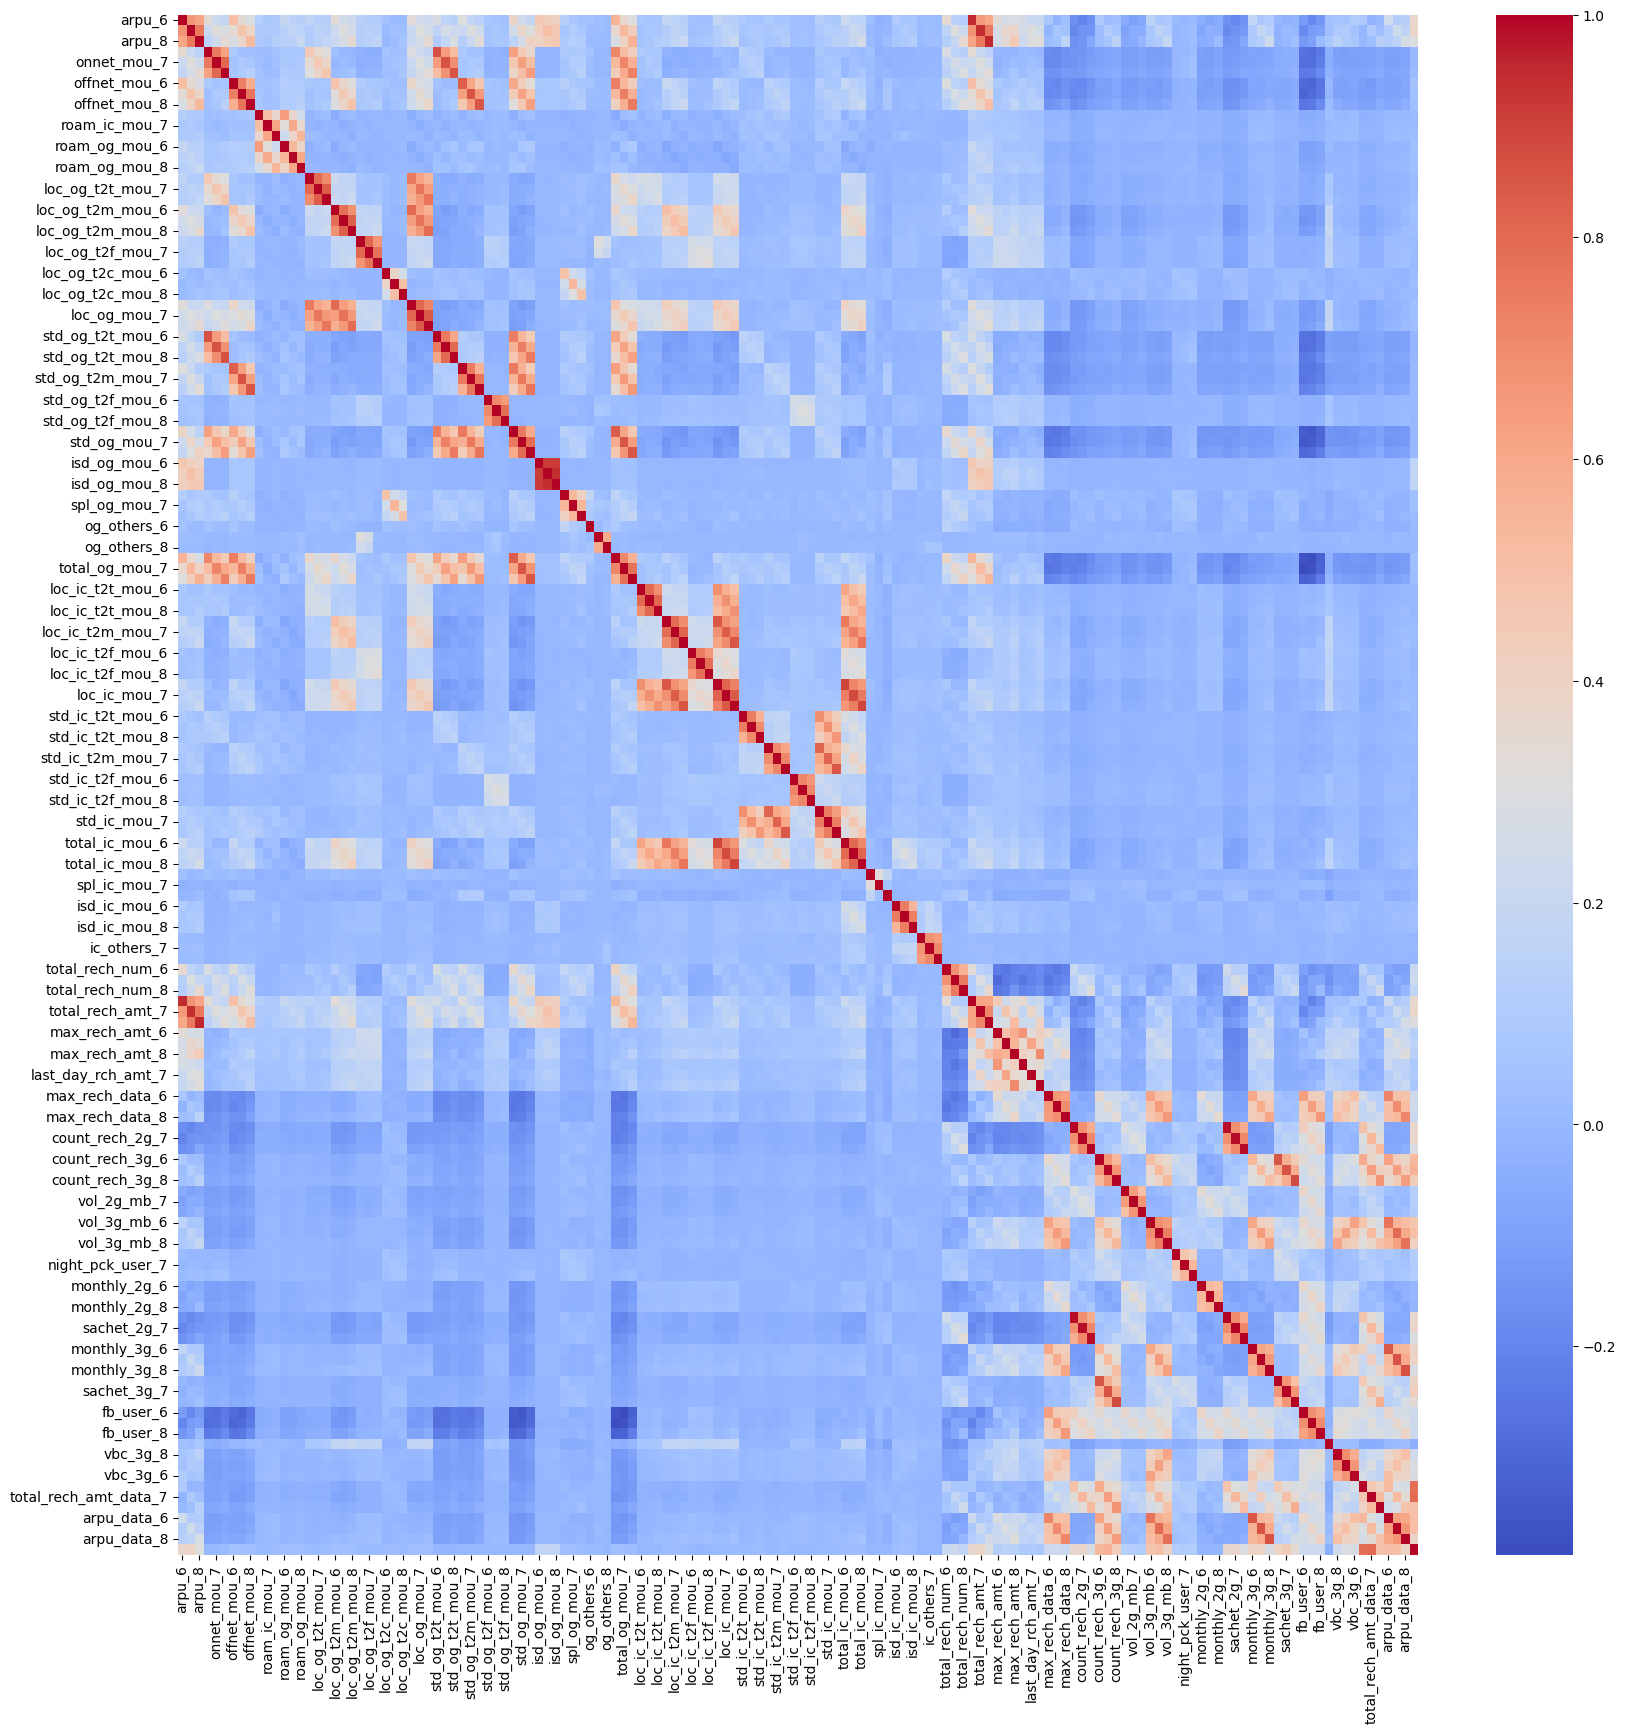

In [ ]:
# Let's see the correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(data_hvc.drop('churn', axis=1).corr(), cmap= 'coolwarm')

In [ ]:
# Finding top 100 High correlated features
a= data_hvc.corr()
corr_0= a.where(np.triu(np.ones(a.shape), k=1).astype(np.bool))
corr_0= corr_0.unstack().dropna()
corr_0= pd.DataFrame(corr_0).reset_index()
corr_0.columns= ['Var 1','Var 2','correlation']
corr_0['abs_correlation']= np.abs(corr_0['correlation'])
corr_0.sort_values('abs_correlation', ascending= False).head(100)

,Var 1,Var 2,correlation,abs_correlation
7857,sachet_2g_8,count_rech_2g_8,0.987175,0.987175
7732,sachet_2g_7,count_rech_2g_7,0.986423,0.986423
7608,sachet_2g_6,count_rech_2g_6,0.984939,0.984939
4467,total_rech_amt_8,arpu_8,0.955322,0.955322
4278,total_rech_amt_6,arpu_6,0.946104,0.946104
4372,total_rech_amt_7,arpu_7,0.943571,0.943571
989,isd_og_mou_8,isd_og_mou_7,0.943120,0.943120
988,isd_og_mou_8,isd_og_mou_6,0.918187,0.918187
945,isd_og_mou_7,isd_og_mou_6,0.915247,0.915247
3066,total_ic_mou_6,loc_ic_mou_6,0.896444,0.896444


Inference:

We can see high class imbalance in data.

If we compare month 6, 7, 8, percentage of fb_user is gradually reducing for churn users. Users who are likely to churn gradually stopped using this service.
Again, more than 50% of non-churn users use this service, where for churn users it's always below 50% and in Action month (August) it's only 14% users quitting this service

Reduction of night pack users can be seen within the churn users.
In June 1.6% of churned users used to use night pack which is almost similar of whole population.
But in the month of July, it became .9% for the churned users and in Action month (August) only .4% of the churned users were using the night pack, which is considerably smaller than the whole population. So, users who suddenly stop using night packs are likely to churn.

Most of the numeric features are right skewed.
We'll take care of this during scaling by performing Robust Scaling, using median and quantile values.

Most of the features have high correlation.
As, first we want to build an interpretable model, we can't perform PCA as it'll change the actual features and Principal Components will not have any business interpretation.

1st Approach: We'll use RFE to reduce correlated features and then we'll build Logistic Regression model and will check VIF and p-value simultaneously to remove multicollinearity and to find statistically significant beta coefficients for identified features.

2nd Approach: Then we'll try PCA and will explore Blackbox models to achieve better performance.

In [ ]:
# Copying data for data preparation
data_hvc1= data_hvc.copy()

Data preparation

Train-Test split

In [ ]:
# Train-Test Split
y= data_hvc1['churn']
X= data_hvc1.drop('churn', axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, stratify= y, random_state= 42)

Oversampling of minority class using SMOTE

In [ ]:
### Oversampling minority class with SMOTE
smote= SMOTE(random_state= 42)
print('Values before oversampling:\n', y_train.value_counts())
X_train_sm, y_train_sm= smote.fit_resample(X_train, y_train)
X_train_sm= pd.DataFrame(X_train_sm, columns= X_train.columns)
print('Values after oversampling:\n', pd.DataFrame(y_train_sm).value_counts())

Values before oversampling:
 0    19264
1     1703
Name: churn, dtype: int64
Values after oversampling:
 churn
0        19264
1        19264
dtype: int64


Scaling numeric features

During EDA we have observed few outliers in numeric features. So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.

In [ ]:
# Selecting columns for scaling
all_cols= X_train_sm.columns.tolist()
print('All columns: ', len(all_cols))
columns_to_remove= ['fb_user_6', 'night_pck_user_6', 'fb_user_7', 'night_pck_user_7', 'fb_user_8', 'night_pck_user_8']
for col in columns_to_remove:
    all_cols.remove(col)
print('All columns after removing: ', len(all_cols))

All columns:  146
All columns after removing:  140


In [ ]:
# Performing Robust Scaling
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train_sm[all_cols]) # Fitting on Training dataset
X_train_sm[all_cols]= scaler.transform(X_train_sm[all_cols]) # Transforming training dataset
X_test[all_cols]= scaler.transform(X_test[all_cols]) # Transforming testing dataset

In [ ]:
# Checking scaled features and shape of training data
print(X_train_sm.shape)
X_train_sm[all_cols].head()

(38528, 146)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_data_6,arpu_data_7,arpu_data_8,avg_rech_amt_6_7
0,-0.084922,0.090254,0.087887,-0.017088,-0.019687,0.050844,0.031196,0.065798,0.239479,0.0,0.0,0.0,0.0,0.0,0.0,0.079014,0.049087,0.240427,0.226100,0.246947,0.484519,1.099257,1.757373,2.18589,0.000000,0.000000,0.000000,0.206783,0.239897,0.498514,-0.006070,-0.003782,0.000000,-0.016792,-0.013222,-0.001232,0.0,0.0,0.0,-0.033635,-0.025450,-0.003299,0.0,0.0,0.0,-0.019892,-0.022177,0.000000,0.000000,0.0,0.0,-0.031290,-0.005238,0.185273,0.063829,0.059592,0.367602,0.121556,0.017191,0.229989,0.705783,0.285581,0.348479,0.164827,0.047372,0.297591,-0.011802,-0.008841,0.050352,-0.036474,0.011869,0.007791,0.000000,0.000000,0.0,-0.046021,-0.013528,0.013976,0.094265,0.008923,0.230304,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.125,-0.108108,-0.064516,0.200931,-0.150152,0.208237,0.332340,0.078667,0.541818,0.538614,-0.10,0.952261,0.400549,0.523038,0.000000,0.108736,0.000000,0.000,0.0,0.331702,0.0,0.125693,0.117279,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.5,0.0,0.0,0.0,0.0,0.347927,0.000000,0.000000,0.000000,0.039096,0.041597,0.000000,0.000000,0.297657,0.000000,0.004983
1,-0.116062,-0.075900,0.012492,-0.042982,-0.035659,-0.011273,-0.015239,0.011008,0.051963,0.0,0.0,0.0,0.0,0.0,0.0,-0.035112,-0.024366,-0.011914,0.059167,0.002133,0.075462,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.009678,-0.021502,0.038600,-0.000875,-0.000816,0.009562,0.026245,0.077923,0.065963,0.0,0.0,0.0,-0.000188,0.038864,0.044914,0.0,0.0,0.0,0.114998,0.049994,0.410710,0.237407,0.0,0.0,-0.080208,-0.053100,0.025111,-0.030831,-0.040981,0.029265,-0.078744,-0.050445,0.056094,-0.005090,0.021389,0.003697,-0.082547,-0.061022,0.036281,0.194863,0.168842,0.438850,0.172914,0.539727,0.436417,0.000000,0.000000,0.0,0.156581,0.389970,0.426056,-0.044140,0.022549,0.110746,0.000000,0.0,0.0,0.0,0.0,0.000000,1.063317,0.018283,0.148284,0.125,0.081081,0.096774,-0.116559,-0.062754,0.022753,-0.038748,-0.093333,-0.090909,-0.073267,0.00,0.

Model Building

We'll first build Logistic Regression model. Then We'll also explore different Blackbox models to improve overall model performance.

1. Logistic Regression (RFE + Manual tunning)

Using RFE to select top 20 features

In [ ]:
# Selecting to 20 features for Logistic Regression using RFE
estimator= LogisticRegression(max_iter= 1000, random_state= 42)
selector= RFE(estimator, n_features_to_select= 20)
selector= selector.fit(X_train_sm, y_train_sm)
selected_cols= X_train_sm.loc[:,selector.support_].columns
selected_cols

Index(['total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'], dtype='object')

In [ ]:
# Selecting top 20 features
X_train_final= X_train_sm[selected_cols]

Building 1st Logistic Regression model

In [ ]:
# Building Logistic Regression model using statsmodels

X_train_final= sm.add_constant(X_train_final) # Adding constraint
lreg1= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_1= lreg1.fit() # Fitting the model

In [ ]:
# Checking the summary of Logistic Regression model
print(lreg_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9402.0
Date:                Sun, 18 Jun 2023   Deviance:                       18804.
Time:                        06:13:35   Pearson chi2:                 7.86e+08
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5927
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8508      0.025     

In [ ]:
# Creating function to calculate VIFs

def vif_calculation(X_df):
    vif= pd.DataFrame()
    X= X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [ ]:
# Calculating the VIFs for the 1st model
vif_calculation(X_train_final)

,Features,VIF
5,count_rech_2g_8,170.04
4,count_rech_2g_7,162.06
13,sachet_2g_8,159.87
12,sachet_2g_7,154.85
8,count_rech_3g_8,101.29
19,sachet_3g_8,71.13
7,count_rech_3g_7,59.90
3,count_rech_2g_6,50.79
11,sachet_2g_6,48.98
18,sachet_3g_7,44.58


All coefficients have p values less than .05 but arpu_7 and total_rech_amt_7 have high VIF. Average Revenue per user (arpu) should have direct correlation with total_rech_amt for the same month. Let's remove total_rech_amt_7 and building the model again.

Building 2nd Logistic Regression model

In [ ]:
# Building Logistic Regression model using statsmodels

lreg2= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_2= lreg2.fit() # Fitting the model

In [ ]:
# Checking the summary of Logistic Regression model
print(lreg_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9402.0
Date:                Sun, 18 Jun 2023   Deviance:                       18804.
Time:                        06:13:37   Pearson chi2:                 7.86e+08
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5927
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8508      0.025     

In [ ]:
# Calculating the VIFs for the 2nd model
vif_calculation(X_train_final)

,Features,VIF
5,count_rech_2g_8,170.04
4,count_rech_2g_7,162.06
13,sachet_2g_8,159.87
12,sachet_2g_7,154.85
8,count_rech_3g_8,101.29
19,sachet_3g_8,71.13
7,count_rech_3g_7,59.90
3,count_rech_2g_6,50.79
11,sachet_2g_6,48.98
18,sachet_3g_7,44.58


All beta coefficients have p values less than .05 except arpu_7, removing it and checking again in next model.

Building 3rd Logistic Regression model

In [ ]:
# Building Logistic Regression model using statsmodels

lreg3= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_3= lreg3.fit() # Fitting the model

In [ ]:
# Checking the summary of Regression model
print(lreg_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9402.0
Date:                Sun, 18 Jun 2023   Deviance:                       18804.
Time:                        06:13:38   Pearson chi2:                 7.86e+08
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5927
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8508      0.025     

In [ ]:
# Calculating the VIFs for the 3rd model
vif_calculation(X_train_final)

,Features,VIF
5,count_rech_2g_8,170.04
4,count_rech_2g_7,162.06
13,sachet_2g_8,159.87
12,sachet_2g_7,154.85
8,count_rech_3g_8,101.29
19,sachet_3g_8,71.13
7,count_rech_3g_7,59.90
3,count_rech_2g_6,50.79
11,sachet_2g_6,48.98
18,sachet_3g_7,44.58


All beta coefficients have p values less than .05 but loc_ic_mou_8 has high VIF, removing it and checking again in next model.

Building 4th Logistic Regression model

In [ ]:
# Building Logistic Regression model using statsmodels
X_train_final.drop('loc_ic_mou_8', axis= 1, inplace= True) # Removing column
lreg4= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_4= lreg4.fit() # Fitting the model

In [ ]:
# Checking the summary of Logistic Regression model
print(lreg_model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38508
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9506.2
Date:                Sun, 18 Jun 2023   Deviance:                       19012.
Time:                        06:13:41   Pearson chi2:                 1.39e+09
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5905
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8097      0.024     

In [ ]:
# Calculating the VIFs for the 4th model
vif_calculation(X_train_final)

,Features,VIF
4,count_rech_2g_8,170.04
3,count_rech_2g_7,162.06
12,sachet_2g_8,159.86
11,sachet_2g_7,154.85
7,count_rech_3g_8,101.29
18,sachet_3g_8,71.12
6,count_rech_3g_7,59.90
2,count_rech_2g_6,50.74
10,sachet_2g_6,48.95
17,sachet_3g_7,44.58


All beta coefficients have p values less than .05 but loc_ic_mou_7 has high VIF, removing it and checking again in next model.


Building 5th Logistic Regression model

In [ ]:
# Building Logistic Regression model using statsmodels

lreg5= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_5= lreg5.fit() # Fitting the model

In [ ]:
# Checking the summary of Logistic Regression model
print(lreg_model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38508
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9506.2
Date:                Sun, 18 Jun 2023   Deviance:                       19012.
Time:                        06:13:44   Pearson chi2:                 1.39e+09
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5905
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8097      0.024     

In [ ]:
# Calculating the VIFs for the 5th model
vif_calculation(X_train_final)

,Features,VIF
4,count_rech_2g_8,170.04
3,count_rech_2g_7,162.06
12,sachet_2g_8,159.86
11,sachet_2g_7,154.85
7,count_rech_3g_8,101.29
18,sachet_3g_8,71.12
6,count_rech_3g_7,59.90
2,count_rech_2g_6,50.74
10,sachet_2g_6,48.95
17,sachet_3g_7,44.58


All beta coefficients have p values less than .05 and VIF values are also lower than 5.

In [ ]:
# Evaluating on Training dataset
y_train_pred= pd.DataFrame(lreg_model_5.predict(X_train_final), columns=['prob'])
y_train_pred['pred_churn']= y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
y_train_pred= y_train_pred.merge(pd.DataFrame(y_train_sm, columns= ['churn']), how= 'inner', left_index= True, right_index= True)
# Get Confusion matrix

print('Confusion Matrix on Training dataset:')

Confusion Matrix on Training dataset:


In [ ]:
# Craeting a function to plot ROC curve

def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False )
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Finding Optimal Probability Cutoff Point

In [ ]:
# Creating different label columns using different probability cutoffs
num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred[i]=  y_train_pred.prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,prob,pred_churn,churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.143908,0,0,1,1,0,0,0,0,0,0,0,0
1,0.143473,0,0,1,1,0,0,0,0,0,0,0,0
2,0.000542,0,0,1,0,0,0,0,0,0,0,0,0
3,0.000043,0,0,1,0,0,0,0,0,0,0,0,0
4,0.000071,0,0,1,0,0,0,0,0,0,0,0,0


Probability cutoff .5 is well balanced.

Final Logistic Regression Summary

In [ ]:
print(lreg_model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38508
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9506.2
Date:                Sun, 18 Jun 2023   Deviance:                       19012.
Time:                        06:15:53   Pearson chi2:                 1.39e+09
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5905
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8097      0.024     

In [ ]:
# Evaluating on Testing dataset
final_cols= X_train_final.columns.tolist()
final_cols.remove('const')
X_test_final= X_test[final_cols]
X_test_final= sm.add_constant(X_test_final) # Adding constraints
y_test_pred= pd.DataFrame(lreg_model_5.predict(X_test_final), columns=['prob'])
y_test_pred['pred_churn']= y_test_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
y_test_pred= y_test_pred.merge(pd.DataFrame(y_test, columns= ['churn']), how= 'inner', left_index= True, right_index= True)

We have got almost similar Accuracy and Recall on training and testing dataset.

On training dataset, we have got Recall of .81 and overall accuracy .81

According to business requirements we need to identify potential users who are likely to churn, we need a model with good Recall/Sensitivity (The model should identify as many True Positive as possible, in this process the model may identify some False Positives as probable churn customer).

Here probability cutoff .5 is well balanced. If business wants to increase Recall/Sensitivity further, then this probability cut-off can be reduced to .4 or .3, but in that case specificity and precision will reduce further (More users will be identified as churners who are not).

Performing PCA

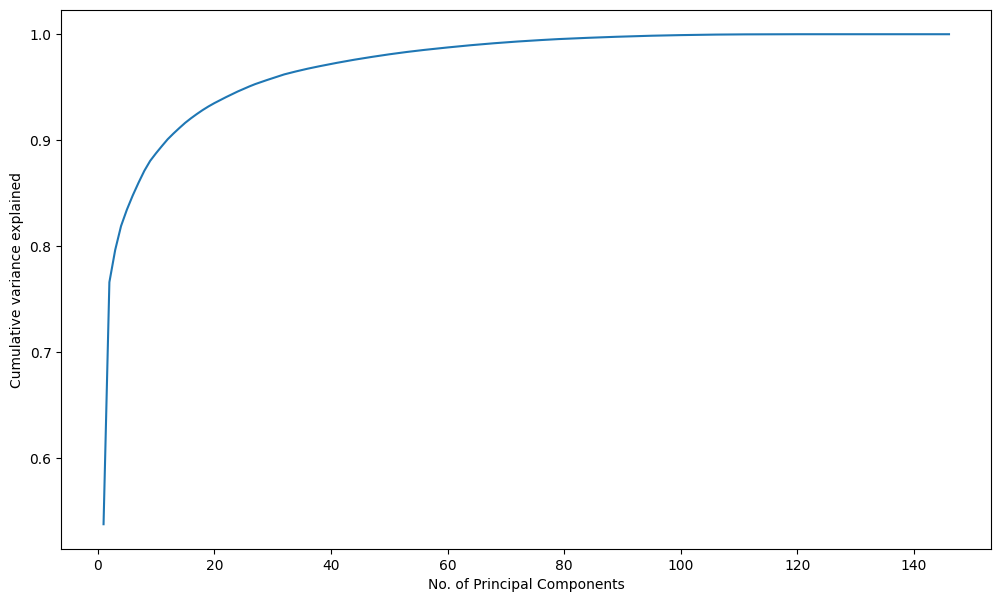

In [ ]:
# Performing PCA and scree plot
pca= PCA(random_state= 42)
pca.fit(X_train_sm)
plt.figure(figsize= [12,7])
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Principal Components')
plt.ylabel('Cumulative variance explained')
plt.show()

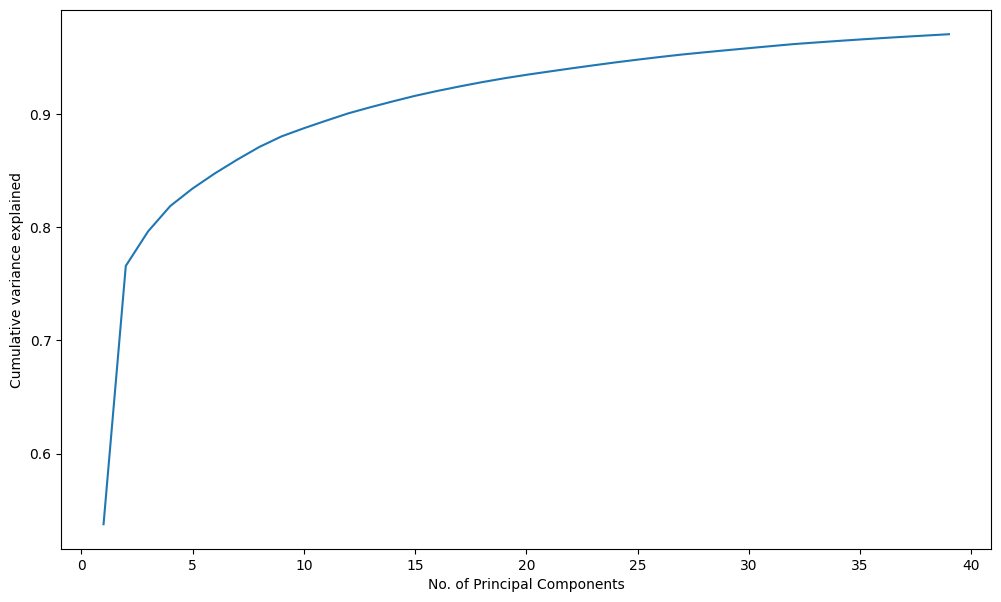

In [ ]:
# Checking no. of components required to explain 97% variance
pca= PCA(.97, random_state= 42)
pca.fit(X_train_sm)
plt.figure(figsize= [12,7])
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Principal Components')
plt.ylabel('Cumulative variance explained')
plt.show()

39 principal components can explain 97% variance in traininging dataset.

In [ ]:
# Transforming training and tetsing dataset
X_train_pc= pca.transform(X_train_sm)
X_test_pc= pca.transform(X_test)

In [ ]:
# Shape of new test and train dataset
X_train_pc.shape, X_test_pc.shape

((38528, 39), (8986, 39))

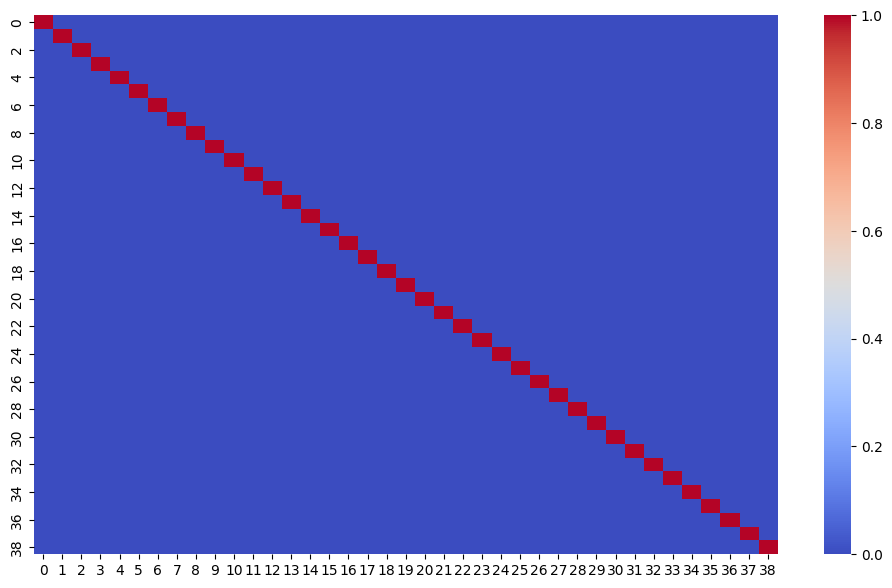

In [ ]:
# Checking correlation coefficients of principal components
plt.figure(figsize= (12,7))
sns.heatmap(pd.DataFrame(X_train_pc).corr(), cmap= 'coolwarm')
plt.show()

As all principal components are orthogonal to each other, so they have no correlation with each other.

2. Random Forest Classifier

In [ ]:
# Using Random Forest Classifier
rfc= RandomForestClassifier(random_state= 42)
rfc.fit(X_train_pc, y_train_sm)
y_train_pred= rfc.predict(X_train_pc)
y_test_pred= rfc.predict(X_test_pc)

It can be seen that our Random Forest model is showing overfitting. We'll use hyperparameter tunning to reduce the variance of the model. According to our business requirement we need higher recall/sensitivity for class 1. That means the model should identify as much True Positive as possible (users likely to churn, should not be missed).

Random Forest- Hyperparameter tunning

In [237]:
# Performing GridSearchCV
rfc= RandomForestClassifier(random_state= 42)
param_grid= { 'n_estimators': [100, 200, 300, 500],
             'max_depth': [4, 5, 9, 12, 15],
             'min_samples_leaf': [15, 20, 25]
             }
gcv_rfc= GridSearchCV(estimator= rfc, param_grid= param_grid, cv= 3, scoring= 'recall', n_jobs= -1, return_train_score= True, verbose= 1)
gcv_rfc_fit= gcv_rfc.fit(X_train_pc, y_train_sm)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [238]:
# Checking best parameters
gcv_rfc_fit.best_params_

{'max_depth': 15, 'min_samples_leaf': 15, 'n_estimators': 500}

In [239]:

# Storing CV result
rfcv_df= pd.DataFrame(gcv_rfc_fit.cv_results_)
#joblib.dump(rfcv_df, '/content/drive/MyDrive/colab_data/rfcv_df.pkl')
#rfcv_df= joblib.load('/content/drive/MyDrive/colab_data/rfcv_df.pkl')
rfcv_df.sort_values('mean_train_score', ascending= False).head(100) # Displaying top 100

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
51,81.503903,0.881972,1.116076,0.342533,15,15,500,"{'max_depth': 15, 'min_samples_leaf': 15, 'n_e...",0.878056,0.906571,0.902352,0.895660,0.012566,1,0.942615,0.935991,0.934205,0.937604,0.003617
50,48.968242,0.442956,0.515659,0.006563,15,15,300,"{'max_depth': 15, 'min_samples_leaf': 15, 'n_e...",0.878368,0.905948,0.901417,0.895244,0.012076,3,0.941213,0.936225,0.933349,0.936929,0.003249
49,31.948398,0.363313,0.467132,0.167656,15,15,200,"{'max_depth': 15, 'min_samples_leaf': 15, 'n_e...",0.879302,0.906260,0.900794,0.895452,0.011636,2,0.940980,0.935913,0.933427,0.936773,0.003143
48,15.810760,0.274539,0.231322,0.067726,15,15,100,"{'max_depth': 15, 'min_samples_leaf': 15, 'n_e...",0.878056,0.904080,0.900639,0.894258,0.011542,4,0.940668,0.934278,0.933037,0.935995,0.003343
39,77.768069,0.850573,0.870508,0.103729,12,15,500,"{'max_depth': 12, 'min_samples_leaf': 15, 'n_e...",0.876188,0.903924,0.898458,0.892857,0.011996,6,0.935918,0.930774,0.926341,0.931011,0.003913
36,15.382283,0.512418,0.184283,0.028795,12,15,100,"{'max_depth': 12, 'min_samples_leaf': 15, 'n_e...",0.874786,0.901900,0.899237,0.891974,0.012202,8,0.935451,0.928749,0.928288,0.930829,0.003273
37,30.460037,0.351654,0.325100,0.003257,12,15,200,"{'max_depth': 12, 'min_samples_leaf': 15, 'n_e...",0.877122,0.902523,0.899081,0.892909,0.011251,5,0.935996,0.928594,0.927821,0.930804,0.003685
38,46.399083,0.104270,0.479619,0.006193,12,15,300,"{'max_depth': 12, 'min_samples_leaf': 15, 'n_e...",0.877122,0.902523,0.898302,0.892649,0.011114,7,0.935607,0.929917,0.926731,0.930752,0.003671
55,78.655768,0.406557,0.834052,0.011261,15,20,500,"{'max_depth': 15, 'min_samples_leaf': 20, 'n_e...",0.867310,0.897384,0.893786,0.886160,0.013409,10,0.925407,0.921585,0.918243,0.921745,0.002927
54,47.006825,0.346419,0.502803,0.009232,15,20,300,"{'max_depth': 15, 'min_samples_leaf': 20, 'n_e...",0.868556,0.897228,0.891450,0.885745,0.012381,12,0.924550,0.920340,0.918399,0.921096,0.002568


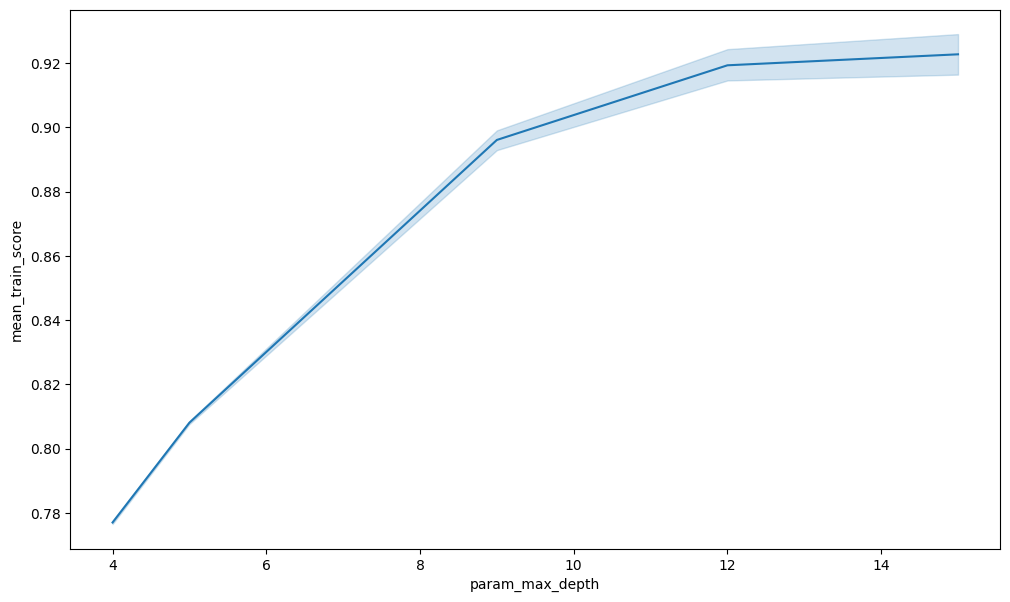

In [240]:
# Plotting param_max_depth vs mean_train_score (mean of cross validation accuracy)
plt.figure(figsize= (12,7))
sns.lineplot(data= rfcv_df, x= 'param_max_depth', y= 'mean_train_score' )
plt.show()

We can see that with increase in max_depth, recall is incraesing. After 12 slope has been reduced. We'll go with 12.

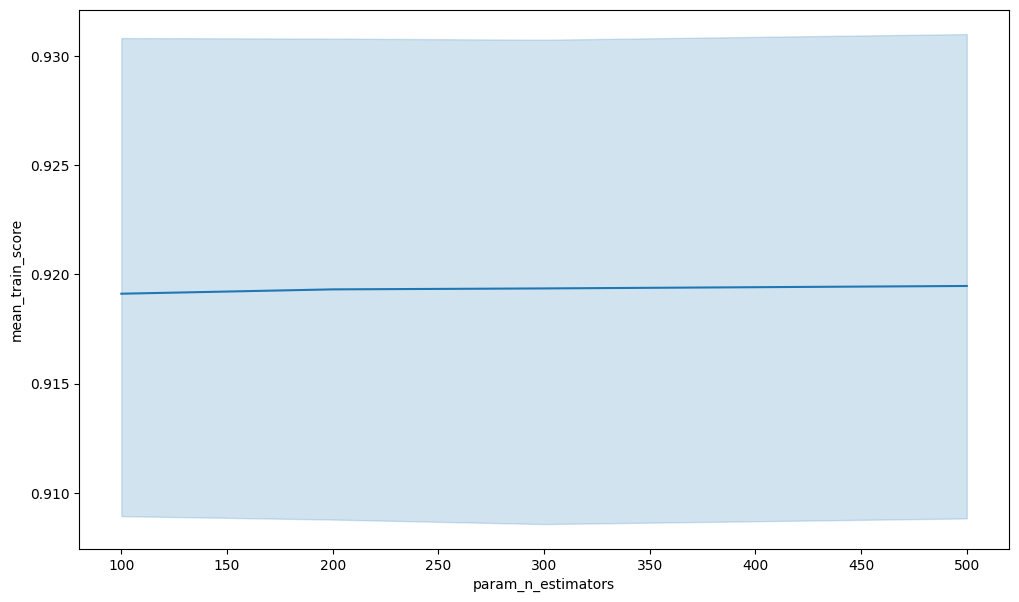

In [241]:
# Plotting param_max_depth vs mean_train_score (mean of cross validation recall) for param_max_depth= 12
plt.figure(figsize= (12,7))
sns.lineplot(data= rfcv_df[(rfcv_df.param_max_depth == 12)], x= 'param_n_estimators', y= 'mean_train_score' )
plt.show()

It can be seen with max_depth= 12, after n_estimators= 300 there is almost no change in score.

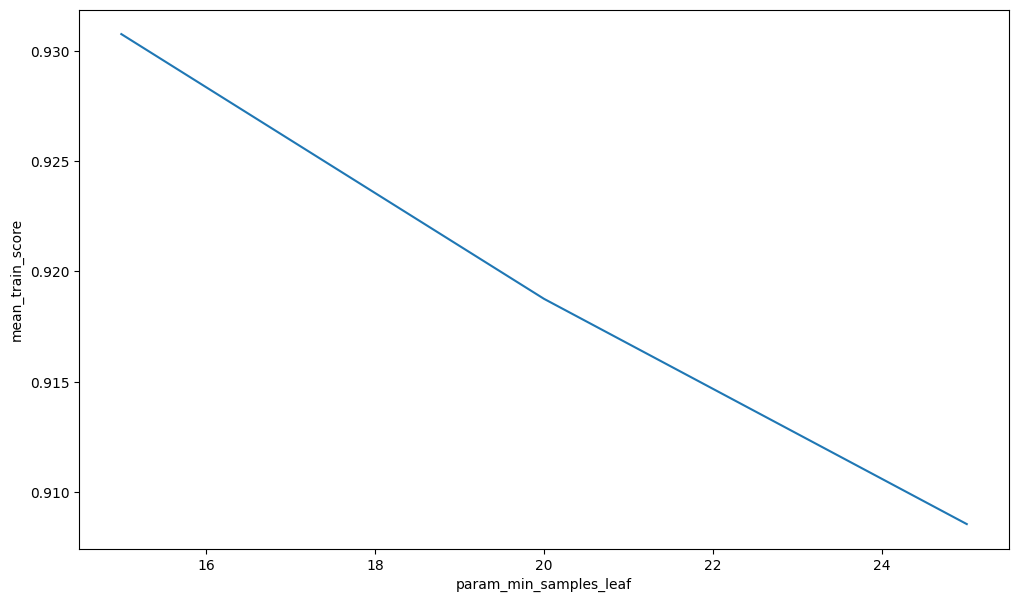

In [242]:
# Plotting param_max_depth vs mean_train_score (mean of cross validation accuracy) for param_max_depth= 15
plt.figure(figsize= (12,7))
sns.lineplot(data= rfcv_df[(rfcv_df.param_max_depth == 12) & (rfcv_df.param_n_estimators== 300)], x= 'param_min_samples_leaf', y= 'mean_train_score' )
plt.show()

In [244]:
# Building Random Forest model with above parameters
rfc= RandomForestClassifier(n_estimators= 300, max_depth= 12, min_samples_leaf= 15, random_state= 42)
rfc.fit(X_train_pc, y_train_sm)
y_train_pred= rfc.predict(X_train_pc)
y_test_pred= rfc.predict(X_test_pc)

O finally, after hyperparameters tunning we have got overall testing accuracy of .88 and recall of .72.

XGBoost Classifier

In [248]:
# Using XGBoost Classifier
xgbcl= XGBClassifier(random_state= 42)
xgbcl.fit(X_train_pc, y_train_sm)
y_train_pred= xgbcl.predict(X_train_pc)
y_test_pred= xgbcl.predict(X_test_pc)


XGBoost Classifier - Hyperparameter tunning

In [250]:
# Param grid
param_grid= {'n_estimators': [100, 200, 300, 500],
        'gamma': [.5, .7, 1],
        'subsample': [.6,.9, 1],
        'colsample_bytree': [.6, .9, 1],
        'max_depth': [4, 6, 8, 9],
        'learning_rate': [.01, .05, .1, .5]
        }

In [253]:
# Performing GridSearchCV
xgbcl= XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state= 42)
gcv_xgbcl= GridSearchCV(estimator= xgbcl, param_grid= param_grid, cv= 3, verbose=3, n_jobs= -1, scoring= 'recall', return_train_score= True)


In [258]:
# Using XGBoost Classifier
xgbcl= XGBClassifier(booster='gbtree',colsample_bytree= 1, subsample= 1, gamma= 1,  learning_rate= 0.5, max_depth= 9, n_estimators= 500, n_jobs= -1,
              random_state=42, verbosity=1)
xgbcl.fit(X_train_pc, y_train_sm)
y_train_pred= xgbcl.predict(X_train_pc)
y_test_pred= xgbcl.predict(X_test_pc)

Conclusion and Recommendations

We have performed data preprocessing, Missing Value Analysis, Feature Engineering, identified most valuable customers, tagged churners, and performed required EDA. We have mentioned few inferences observed during EDA.

As part of data preparation, we have split the data into train-test dataset and performed SMOTE on training dataset to handle class imbalance. We have performed scaling (Used Robust scaling to handle outliers) before building our first model.

We have used Logistic Regression model on actual features. We have used RFE to select top 20 features and then performed manual tunning to remove multicollinearity and make sure that all beta coefficients are statistically significant. From final Logistic Regression model, we can find below features importance to perform churn prediction.

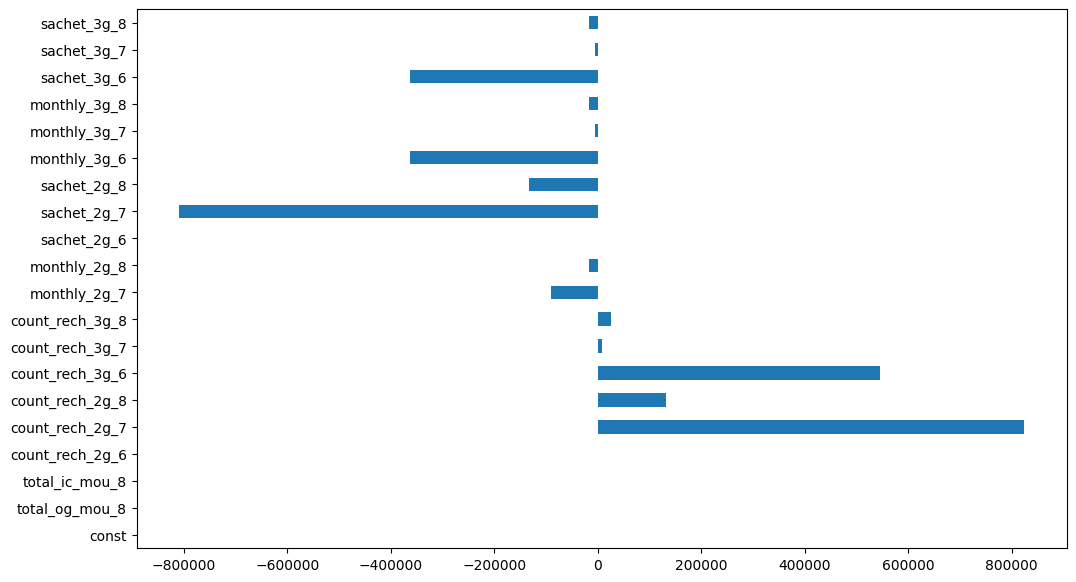

In [263]:
# Plotting important features with beta coefficients values
plt.figure(figsize= (12,7))
lreg_model_5.params.plot(kind= 'barh')
plt.show()

We have got almost similar Accuracy and Recall on training and testing dataset.

Here probability cutoff .5 is well balanced. If business wants to increase Recall/Sensitivity further, then this probability cut-off can be reduced to .4 or .3, but in that case specificity and precision will reduce further (More users will be identify as churners who are actually not).

Then we have performed PCA and kept 97% of variance by selecting 39 Principal Components. We used Random Forest and then performed hyperparameters tunning to tune our Random Forest model. Final Classification on testing dataset report after performing hyperparameters tunning is as below:

Followed by that, We used XGBoost Classifier and then perfomed hyperparameters tunning to tune our XGB Classifier model. Final Classification on testing dataset report after performing hyperparameters tunning is as below:

If we compare all 3 models. XGBoost has highest accuracy then followed by Random Forest Classifier and Logistic Regression. But according to business requirements to identify potential users who are likely to churn, we need a model with good Recall/Sensitivity (The model should identify as many True Positive as possible, in this process the model may identify some False Positives as probable churn customer). In that regards Logistic Regression is the best model in metric of recall.

As discussed earlier, probability cut-off of this logistic regression model can be reduced further to .4, .3 etc. to increase the recall further (if the business wants to be more aggressive to find all potential churn customers).

From beta-coefficients of the Logistic Regression model, it can be seen that:
total_ic_mou_8 (Total incoming call during month August/ action phase) is the most important feature. Other features like total_rech_num_8 (Total no. of recharge during action phase), loc_og_mou_8 (Local outgoing call during month 8/ Action phase).
It can be seen features of action phase (8) and 2nd month of good phase (7) are the most important to determine if a user is going to churn or not.
Business should focus on these features shown in above bar plot to identify possible churners and reach them to understand their pain points. For example, reduction in total incoming minutes, total local outgoing calls, no. of recharges, 3g data consumption, last recharge amount etc. in action phase (month 8), stopping fb service etc. may indicate high probability of churn.

Feature importance:

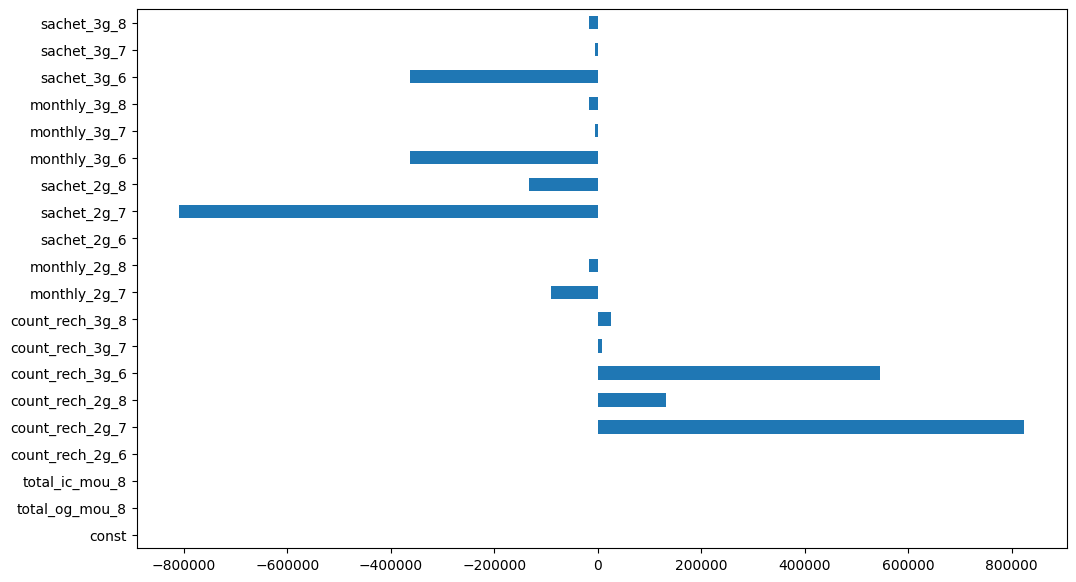
